In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import codecs
import glob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

D:\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or 

# Outils informatiques pour la diplomatique

# Machine learning
## Vision par ordinateur
## Traitement automatique des langues

# 1) Reconnaissance de l'écriture manuscrite (REM ou HTR)

### <font color=brown>extraction des formes à partir de l'image de un texte manuscrit</font>

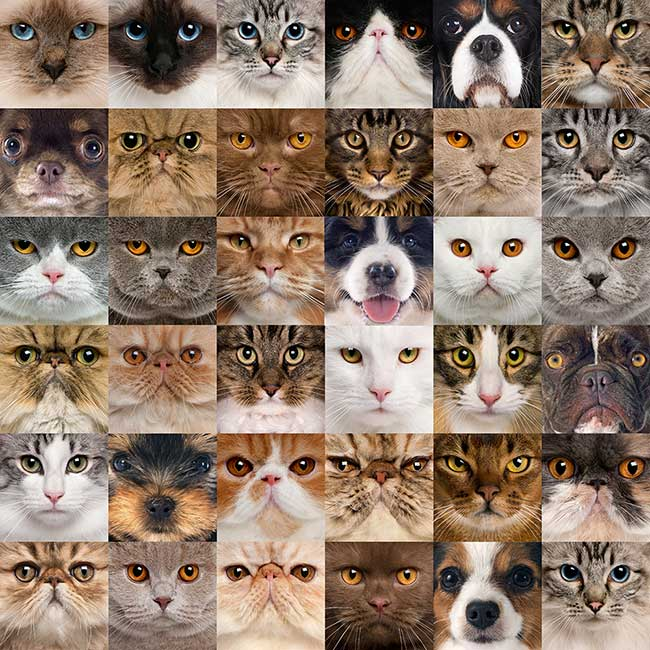

In [7]:
#cats_dogs
from IPython.display import Image
Image(filename="img/cats_dogs_2.jpg")

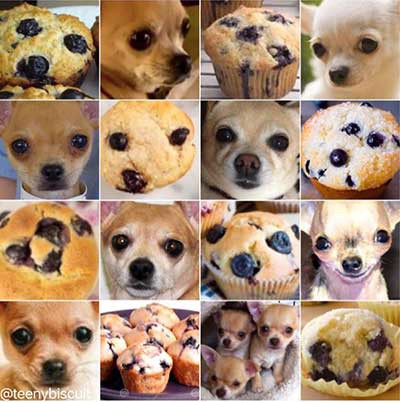

In [8]:
#cookies
from IPython.display import Image
Image(filename="img/machine_cookies.jpg")

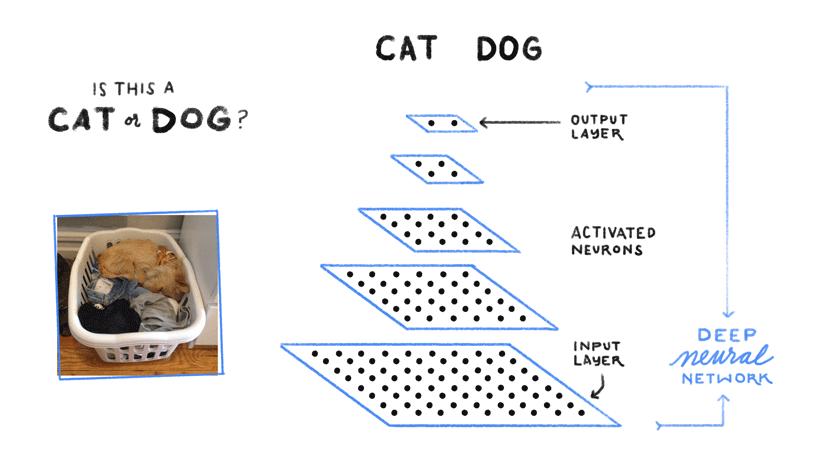

In [9]:
#cats-dogs_cnn
from IPython.display import Image
Image(filename="img/cats_dogs.gif")

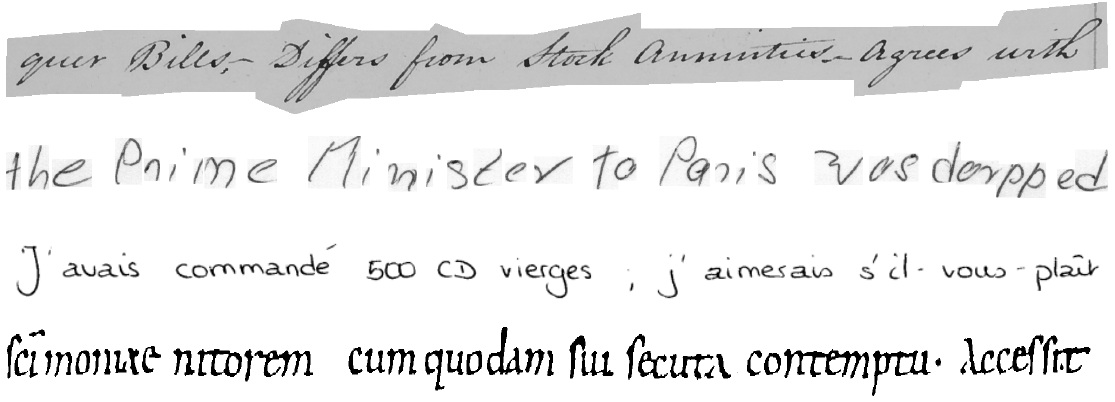

In [10]:
#HTR lines examples
from IPython.display import Image
Image(filename="img/HTR_1.png")

In [12]:
#https://www.e-codices.unifr.ch/en/list/one/csg/0635
#https://zenodo.org/record/44519#.YEkkcGhKhaQ
SG= ["Deposito ergo terrenae dignitatis amictu, sanctimoniae nitorem cum quodam sui secuta contemptu, accessit ad altare, et in faciem proruens, Dominum studiosius adoravit; ac deinde cum se erigeret, cornu comprehendit altaris, et huiuscemodi voces emisit: Beate Stephane, qui sanguine tuo testimonium Christo perhibuisti, deprecationem meam tuis meritis Domino commendato, ut tua intercessione hodie cor domini mei regis convertat secundum voluntatem meam, ne velamen quod amore Dei suscepi, auferat de capite meo. Viri ergo qui erant cum illa haec videntes venerunt ad regem, et nuntiaverunt ei quae facta fuerunt."]

In [13]:
SG#print Saint-Gall text

['Deposito ergo terrenae dignitatis amictu, sanctimoniae nitorem cum quodam sui secuta contemptu, accessit ad altare, et in faciem proruens, Dominum studiosius adoravit; ac deinde cum se erigeret, cornu comprehendit altaris, et huiuscemodi voces emisit: Beate Stephane, qui sanguine tuo testimonium Christo perhibuisti, deprecationem meam tuis meritis Domino commendato, ut tua intercessione hodie cor domini mei regis convertat secundum voluntatem meam, ne velamen quod amore Dei suscepi, auferat de capite meo. Viri ergo qui erant cum illa haec videntes venerunt ad regem, et nuntiaverunt ei quae facta fuerunt.']

In [24]:
#tokenizer
tokenizer = Tokenizer(num_words=100, char_level = False)
tokenizer.fit_on_texts(SG)

X_train = tokenizer.texts_to_sequences(SG)

In [106]:
#print text and matrix
print(SG, "\n\n", X_train[0])

['Deposito ergo terrenae dignitatis amictu, sanctimoniae nitorem cum quodam sui secuta contemptu, accessit ad altare, et in faciem proruens, Dominum studiosius adoravit; ac deinde cum se erigeret, cornu comprehendit altaris, et huiuscemodi voces emisit: Beate Stephane, qui sanguine tuo testimonium Christo perhibuisti, deprecationem meam tuis meritis Domino commendato, ut tua intercessione hodie cor domini mei regis convertat secundum voluntatem meam, ne velamen quod amore Dei suscepi, auferat de capite meo. Viri ergo qui erant cum illa haec videntes venerunt ad regem, et nuntiaverunt ei quae facta fuerunt.'] 

 [7, 3, 8, 9, 10, 11, 12, 1, 13, 14, 15, 16, 17, 4, 18, 2, 19, 20, 21, 22, 23, 24, 25, 26, 1, 27, 28, 29, 30, 31, 2, 32, 33, 34, 35, 36, 5, 37, 38, 39, 40, 41, 42, 6, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 6, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 3, 5, 69, 1, 70, 71, 72, 73, 4, 74, 2, 75, 76, 77, 78, 79]


In [118]:
from collections import Counter
Counter(SG[0].split())

Counter({'Deposito': 1,
         'ergo': 2,
         'terrenae': 1,
         'dignitatis': 1,
         'amictu,': 1,
         'sanctimoniae': 1,
         'nitorem': 1,
         'cum': 3,
         'quodam': 1,
         'sui': 1,
         'secuta': 1,
         'contemptu,': 1,
         'accessit': 1,
         'ad': 2,
         'altare,': 1,
         'et': 3,
         'in': 1,
         'faciem': 1,
         'proruens,': 1,
         'Dominum': 1,
         'studiosius': 1,
         'adoravit;': 1,
         'ac': 1,
         'deinde': 1,
         'se': 1,
         'erigeret,': 1,
         'cornu': 1,
         'comprehendit': 1,
         'altaris,': 1,
         'huiuscemodi': 1,
         'voces': 1,
         'emisit:': 1,
         'Beate': 1,
         'Stephane,': 1,
         'qui': 2,
         'sanguine': 1,
         'tuo': 1,
         'testimonium': 1,
         'Christo': 1,
         'perhibuisti,': 1,
         'deprecationem': 1,
         'meam': 1,
         'tuis': 1,
         'meritis': 

In [107]:
#printing dict tuples
couples=[([k for k,v in tokenizer.word_index.items() if x==v][0], x) for x in X_train[0]]
print(couples)
#tokenizer.word_index

[('deposito', 7), ('ergo', 3), ('terrenae', 8), ('dignitatis', 9), ('amictu', 10), ('sanctimoniae', 11), ('nitorem', 12), ('cum', 1), ('quodam', 13), ('sui', 14), ('secuta', 15), ('contemptu', 16), ('accessit', 17), ('ad', 4), ('altare', 18), ('et', 2), ('in', 19), ('faciem', 20), ('proruens', 21), ('dominum', 22), ('studiosius', 23), ('adoravit', 24), ('ac', 25), ('deinde', 26), ('cum', 1), ('se', 27), ('erigeret', 28), ('cornu', 29), ('comprehendit', 30), ('altaris', 31), ('et', 2), ('huiuscemodi', 32), ('voces', 33), ('emisit', 34), ('beate', 35), ('stephane', 36), ('qui', 5), ('sanguine', 37), ('tuo', 38), ('testimonium', 39), ('christo', 40), ('perhibuisti', 41), ('deprecationem', 42), ('meam', 6), ('tuis', 43), ('meritis', 44), ('domino', 45), ('commendato', 46), ('ut', 47), ('tua', 48), ('intercessione', 49), ('hodie', 50), ('cor', 51), ('domini', 52), ('mei', 53), ('regis', 54), ('convertat', 55), ('secundum', 56), ('voluntatem', 57), ('meam', 6), ('ne', 58), ('velamen', 59), (

In [108]:
tokenizer.word_index

{'cum': 1,
 'et': 2,
 'ergo': 3,
 'ad': 4,
 'qui': 5,
 'meam': 6,
 'deposito': 7,
 'terrenae': 8,
 'dignitatis': 9,
 'amictu': 10,
 'sanctimoniae': 11,
 'nitorem': 12,
 'quodam': 13,
 'sui': 14,
 'secuta': 15,
 'contemptu': 16,
 'accessit': 17,
 'altare': 18,
 'in': 19,
 'faciem': 20,
 'proruens': 21,
 'dominum': 22,
 'studiosius': 23,
 'adoravit': 24,
 'ac': 25,
 'deinde': 26,
 'se': 27,
 'erigeret': 28,
 'cornu': 29,
 'comprehendit': 30,
 'altaris': 31,
 'huiuscemodi': 32,
 'voces': 33,
 'emisit': 34,
 'beate': 35,
 'stephane': 36,
 'sanguine': 37,
 'tuo': 38,
 'testimonium': 39,
 'christo': 40,
 'perhibuisti': 41,
 'deprecationem': 42,
 'tuis': 43,
 'meritis': 44,
 'domino': 45,
 'commendato': 46,
 'ut': 47,
 'tua': 48,
 'intercessione': 49,
 'hodie': 50,
 'cor': 51,
 'domini': 52,
 'mei': 53,
 'regis': 54,
 'convertat': 55,
 'secundum': 56,
 'voluntatem': 57,
 'ne': 58,
 'velamen': 59,
 'quod': 60,
 'amore': 61,
 'dei': 62,
 'suscepi': 63,
 'auferat': 64,
 'de': 65,
 'capite': 66,


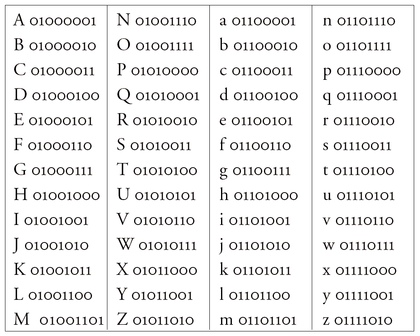

In [14]:
#binary characters mood
from IPython.display import Image
Image(filename="img/binary.png")

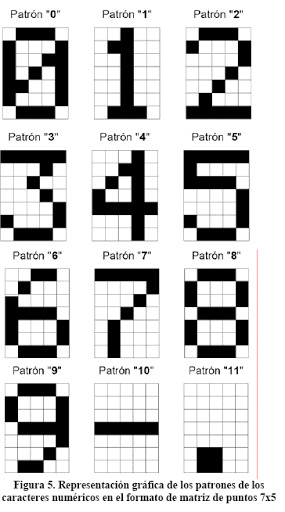

In [15]:
#numbers matrix
from IPython.display import Image
Image(filename="img/ocr_4.jpg")

In [16]:
#zero matrix print
from termcolor import colored
CSI = "\x1B["
numbers=[x for x in "01110100011001110101110011000101110"]
numbers=[CSI+"7;30m" + "1"+ CSI + "0m" if x=="1" else x for x in numbers]
shape_a=list(zip(*[iter(numbers)]*5))
shape_a=["-".join(x) for x in shape_a]
for x in shape_a:
    print(x)

0-1-1-1-0
1-0-0-0-1
1-0-0-1-1
1-0-1-0-1
1-1-0-0-1
1-0-0-0-1
0-1-1-1-0


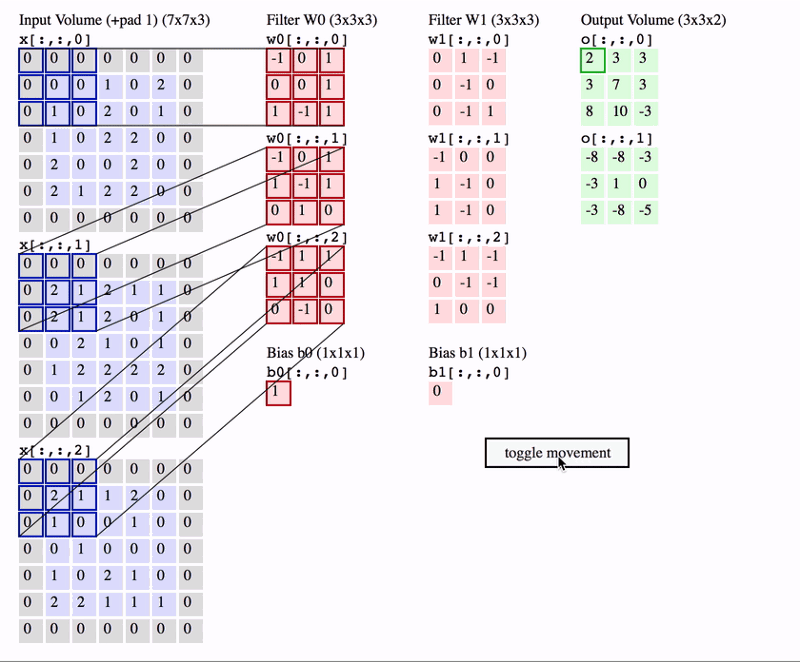

In [17]:
#cnn squeeze matrix
from IPython.display import Image
Image(filename="img/cnn.gif")

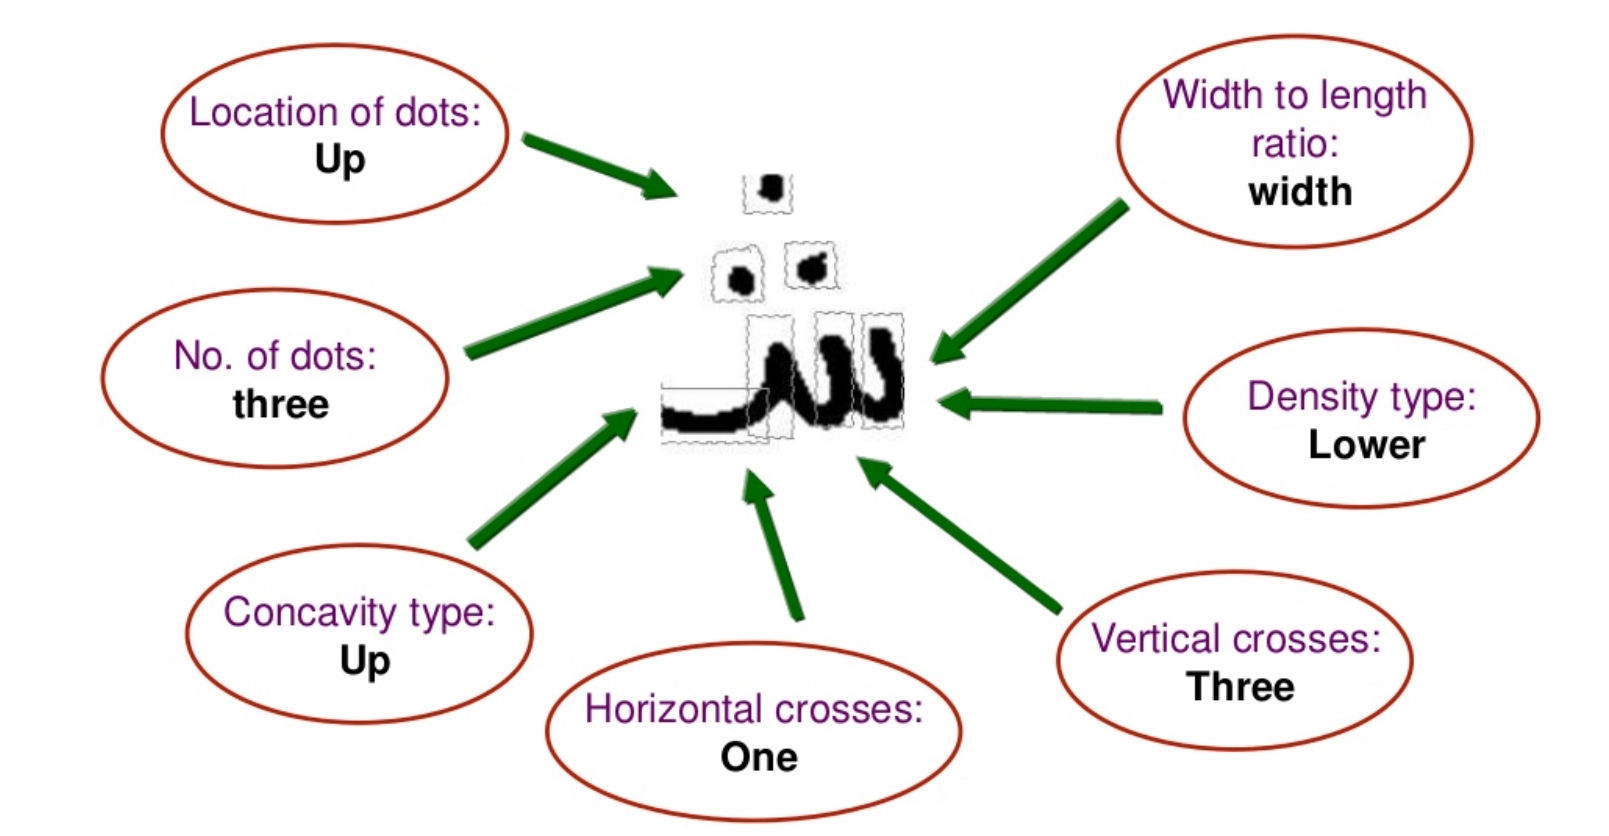

In [18]:
#arab char, shiin
from IPython.display import Image
Image(filename="img/arab_char.jpg")

# 1) reconnaissance optique de caractères (OCR optical character  recognition)

## transformation d'images de textes imprimés vers fichiers de texte plat

### <font color=brown>Rend disponible à la recherche le texte d’images des documents imprimés</font>
### <font color=brown>Permet la saisie automatique de données textuelles</font>

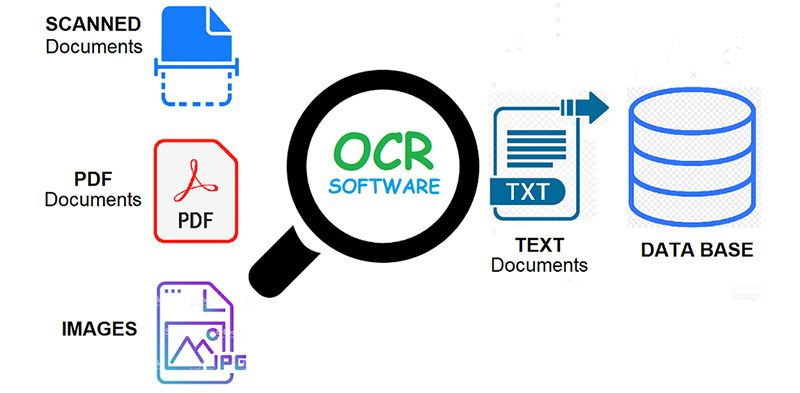

In [113]:
#what is OCR: pipeline
from IPython.display import Image
Image(filename="img/ocr_1.jpg")

In [94]:
#how it works OCR
from IPython.display import Image
Image(filename="img/ocr_3.png")

### <font color=brown>logiciels propiétaire et logiciels libres. Principalement deux options:</font>
### <font color=brown>abbyy finereader (payant)</font>
### <font color=brown>Tesseract 5.0 (libre)</font>

## 1.1 problèmes specifiques aux numérisations
### <font color=brown>diversité dans les formats textuels, la plupart des logiciels ne conservent pas la mise en page (on peut travailler sur ALTO)</font>
### <font color=brown>haute sensibilité à la qualité de la numérisation</font>
### <font color=brown>textes dans plus d'une langue ou état de langue</font>
### <font color=brown>mise en page souvent très chargé (éditions critiques, éditions diplomatiques, éditions commentées)</font>

## 1.2. problèmes specifiques aux logiciels
### <font color=brown>abbyy travaille sur plusiers formats mais la performance est inferieur à celle de Tesseract</font>
### <font color=brown>Par contre Tesseract doit opèrer sur le bash et que sur des fichiers d'image.</font>
### <font color=brown>Plusiers formats de sortie et conservation de certains parties de la mise en page.</font>

In [65]:
#reading tesseract output
ND_T=open("out_3.txt", "r", encoding="utf-8")
ND_T=ND_T.read()

In [ ]:
#for x in ND_T.split("\x0c"):
splits=[index for index,x in enumerate(ND_T.split("\n")) if len(x)<5]
splits

# 2) nettoyage et structuration des résultats

### Corriger les possibles erreurs de l'ocr
### erreurs communes : chiffres, accents, noms de personnes, page endommagée


### organiser les données pour les traiter plus facilement
### reconnaître certaines structures à l'interieur du texte pour mieux indexer et classer un document

In [33]:
from polyglot.detect import Detector

In [34]:
a="The conversion of the analog data isn't completed. At the moment it contains only French, German, English, Italian, Latin and Spanish terms. "

In [35]:
a

"The conversion of the analog data isn't completed. At the moment it contains only French, German, English, Italian, Latin and Spanish terms. "

In [70]:
print(Detector(a).languages[0])

name: inglés      code: en       confidence:  99.0 read bytes:  1312


In [167]:
#
count=0
for index, group in enumerate(ND_T.split("\n\n")):
    if len(group)>1:
        count+=1
        print(count, group, "\n")

1 322 

2 VIIL 

3 1208. — Hamelin. évêque du Mans, nolifie la donation faite à
l'abbaye de la Trappe par Guillaume des Roches, sénéchal
d'Anjou, d'une somme d'huile par an sur ses revenus de la
Suze. 

4 Ego, Hamelinus, Dei gratia cenomannensis episcopus, omni-
bus presentem paginam inspeeluris, salutem in salutis afu)etore.
Noverit universitas vestra quod Willelmus de Rupibus (l)
senescallus andegavensis, pro salute anime sue el Margarite,
ejus uxoris, et parentum et amicorum suorum, dedil'el concessit,
in perpetuam et puram elemosinam, ecclesie Beate Marie de
Trappa unam summam olei in redditibus suis de Susa (2), con-
cedente dicta Margarila, uxore sua. Ne vero tam celebre donum
oblivioni traderetur, nos, ad pelitionem dicti Willelmi, andega-
vensis senescalli, ejus elemosiam aprobautes, presentem cartam,
rei seriem continentem, sigilli nostri munimine confirmavimus.
Actum apud Hussum (3), [anno] M° CC* VIII 

5     

6    

7 IX 

8 1208. — Guillaume des Roches, sénéchal d'Anjou, 

In [52]:
#do not modify underline, polyglot
for group in ND_T.split("\n\n"):
    if not group.isdigit():
        try:
            print(Detector(group).languages[0], "\n",group, "\n\n")
        except:
            continue

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


name: estonio     code: et       confidence:  83.0 read bytes:   409 
 VIIL 


name: francés     code: fr       confidence:  99.0 read bytes:   476 
 1208. — Hamelin. évêque du Mans, nolifie la donation faite à
l'abbaye de la Trappe par Guillaume des Roches, sénéchal
d'Anjou, d'une somme d'huile par an sur ses revenus de la
Suze. 


name: latín       code: la       confidence:  99.0 read bytes:   625 
 Ego, Hamelinus, Dei gratia cenomannensis episcopus, omni-
bus presentem paginam inspeeluris, salutem in salutis afu)etore.
Noverit universitas vestra quod Willelmus de Rupibus (l)
senescallus andegavensis, pro salute anime sue el Margarite,
ejus uxoris, et parentum et amicorum suorum, dedil'el concessit,
in perpetuam et puram elemosinam, ecclesie Beate Marie de
Trappa unam summam olei in redditibus suis de Susa (2), con-
cedente dicta Margarila, uxore sua. Ne vero tam celebre donum
oblivioni traderetur, nos, ad pelitionem dicti Willelmi, andega-
vensis senescalli, ejus elemosiam aprobaut

In [168]:
#choosing groups by index designation
actes={}
key=[]
groups=[1,3,9,11,23,26,29,31,33,37,40,44,51,57,60,70,72,79,81, 91,94,96]
for index, group in enumerate(ND_T.split("\n\n")):
    if index in groups:
        if len(group)<10:
            key=group
            actes[key]=[]
        else:
            actes[key].append(group)
        print(index, group, "\n")

1 VIIL 

3 Ego, Hamelinus, Dei gratia cenomannensis episcopus, omni-
bus presentem paginam inspeeluris, salutem in salutis afu)etore.
Noverit universitas vestra quod Willelmus de Rupibus (l)
senescallus andegavensis, pro salute anime sue el Margarite,
ejus uxoris, et parentum et amicorum suorum, dedil'el concessit,
in perpetuam et puram elemosinam, ecclesie Beate Marie de
Trappa unam summam olei in redditibus suis de Susa (2), con-
cedente dicta Margarila, uxore sua. Ne vero tam celebre donum
oblivioni traderetur, nos, ad pelitionem dicti Willelmi, andega-
vensis senescalli, ejus elemosiam aprobautes, presentem cartam,
rei seriem continentem, sigilli nostri munimine confirmavimus.
Actum apud Hussum (3), [anno] M° CC* VIII 

9 IX 

11 Ego, Guillelmus de Rupipus, senescallus andegavensis, omni-
bus presentes litteras inspecturis, in vero salntari salutem. Nove-
rit universitas vestra quod ego, cum assensu Margarite, uxoris 

23 mee, dedi Deoet Beate Marie el monachis Domus Dei de 'rappa,

In [171]:
#grouping charters
#key:valeur
#titre:acte
for k,v in actes.items():
    print("Numero de l'acte : ", k, "\nTexte de l'acte : \t", " ".join(v), "\n\n")

Numero de l'acte :  VIIL 
Texte de l'acte : 	 Ego, Hamelinus, Dei gratia cenomannensis episcopus, omni-
bus presentem paginam inspeeluris, salutem in salutis afu)etore.
Noverit universitas vestra quod Willelmus de Rupibus (l)
senescallus andegavensis, pro salute anime sue el Margarite,
ejus uxoris, et parentum et amicorum suorum, dedil'el concessit,
in perpetuam et puram elemosinam, ecclesie Beate Marie de
Trappa unam summam olei in redditibus suis de Susa (2), con-
cedente dicta Margarila, uxore sua. Ne vero tam celebre donum
oblivioni traderetur, nos, ad pelitionem dicti Willelmi, andega-
vensis senescalli, ejus elemosiam aprobautes, presentem cartam,
rei seriem continentem, sigilli nostri munimine confirmavimus.
Actum apud Hussum (3), [anno] M° CC* VIII 


Numero de l'acte :  IX 
Texte de l'acte : 	 Ego, Guillelmus de Rupipus, senescallus andegavensis, omni-
bus presentes litteras inspecturis, in vero salntari salutem. Nove-
rit universitas vestra quod ego, cum assensu Margarite, ux

In [172]:
#cleaning dots, notes, index, separing commas, joining results by page
import re
text_process=[]
#re.sub(r'\([^)]*\)', '', v)
for k,v in actes.items():
    print(k)
    v=" ".join(v)
    v=v.replace("-", "")
    v=v.replace("\n", " ")
    v=re.sub(r'\([^)]*\)', '', v)
    print("Numero de l'acte : ", k, "\nTexte de l'acte : \t", v, "\n\n")
    text_process.append("NUMERO_"+str(k)+" "+str(v))

VIIL
Numero de l'acte :  VIIL 
Texte de l'acte : 	 Ego, Hamelinus, Dei gratia cenomannensis episcopus, omni bus presentem paginam inspeeluris, salutem in salutis afu)etore. Noverit universitas vestra quod Willelmus de Rupibus  senescallus andegavensis, pro salute anime sue el Margarite, ejus uxoris, et parentum et amicorum suorum, dedil'el concessit, in perpetuam et puram elemosinam, ecclesie Beate Marie de Trappa unam summam olei in redditibus suis de Susa , con cedente dicta Margarila, uxore sua. Ne vero tam celebre donum oblivioni traderetur, nos, ad pelitionem dicti Willelmi, andega vensis senescalli, ejus elemosiam aprobautes, presentem cartam, rei seriem continentem, sigilli nostri munimine confirmavimus. Actum apud Hussum , [anno] M° CC* VIII 


IX
Numero de l'acte :  IX 
Texte de l'acte : 	 Ego, Guillelmus de Rupipus, senescallus andegavensis, omni bus presentes litteras inspecturis, in vero salntari salutem. Nove rit universitas vestra quod ego, cum assensu Margarite, uxoris m

# 3) Traitement des textes par fouille de données

## machine learning

### estimer un modèle à partir de données
### mise en production du modele

## <font color=brown>a) Entités nommées</font>

### - Est une expression linguistique ou unité lexicale qui désigne un nom de lieu, un nom de personne ou un nom d'organisation

### - Elles ne font pas partie des dictionnaires d'une langue. Elles ne sont récuperables lors d'une lemmatisation

### - Elles sont des designateurs rigides: elles se réfèrent au même individu dans tous les mondes possibles

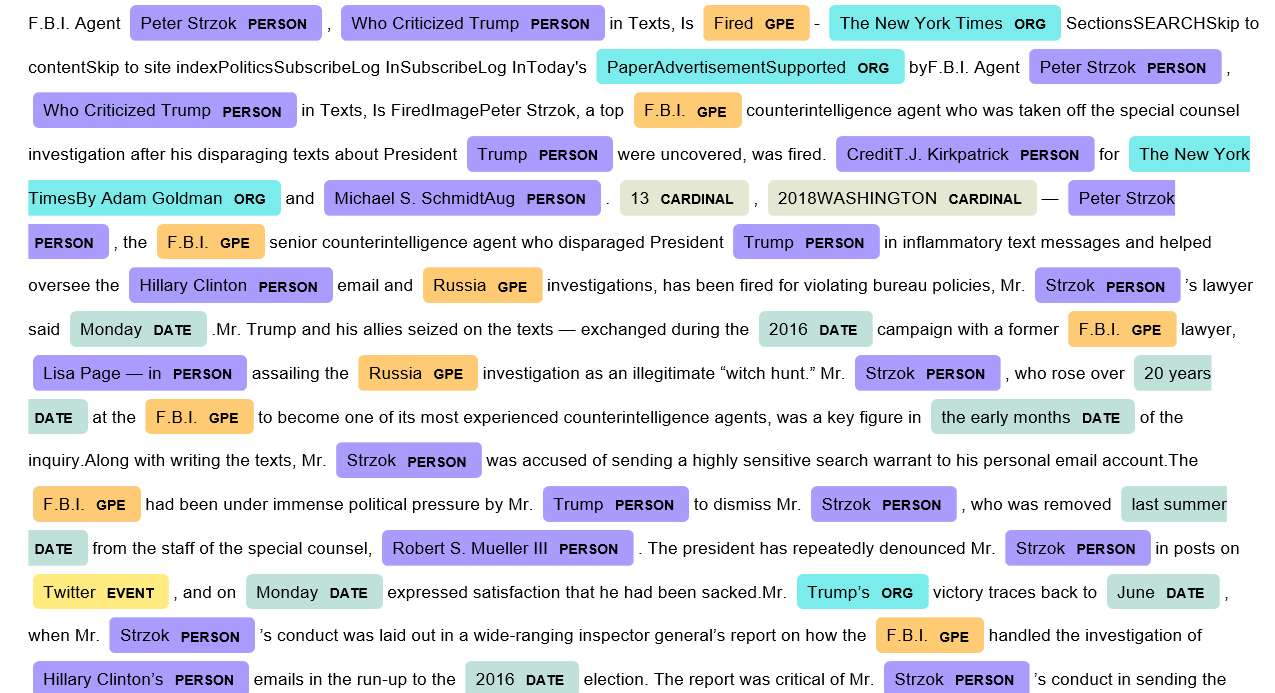

In [19]:
#ner poly spacy
from IPython.display import Image
Image(filename="img/ner_1.png")

In [ ]:
#ner linkingfrom IPython.display import Image
Image(filename="img/ner_2.png")

In [ ]:
#ner process
from IPython.display import Image
Image(filename="img/ner_3.jpg")

## <font color=brown> b) Lemmes et POS (parts-of-speech-tagging)</font>

### - Lemme : unité sémantique pouvant constituer une entrée de dictionnaire.
### - un dictionnaire recense les lemmes d'une langue mais non les formes de ce lemme
### - pour le latin, nominatif singulier , première personne du singulier, supine
### - étiquetage morpho-syntaxique ou POS tagging (part-of-speech tagging) en anglais est le processus qui consiste à associer aux mots d'un texte les catégories grammaticales prédefinies : verbe, adverbe, nom commun, etc.

## <font color=brown> c) Parties du discours diplomatique</font>

### - Détection de la séquence d'énoncés ou d'actes scripturaires utilisés ou mis en place lors de la rédaction d'un document

### - Modèles scripturaires particulières qui déterminent la configuration de pratiques sociales et intellectuelles pour transmettre de l'information

### - circulation des modèles et des formules, modes et changements dans le vocabulaire, évolution des pratiques de l'écrit, rattachement aux traditions

In [173]:
#generating chunk-text to tools treatment
text_process=" ".join(text_process)
text_process

"NUMERO_VIIL Ego, Hamelinus, Dei gratia cenomannensis episcopus, omni bus presentem paginam inspeeluris, salutem in salutis afu)etore. Noverit universitas vestra quod Willelmus de Rupibus  senescallus andegavensis, pro salute anime sue el Margarite, ejus uxoris, et parentum et amicorum suorum, dedil'el concessit, in perpetuam et puram elemosinam, ecclesie Beate Marie de Trappa unam summam olei in redditibus suis de Susa , con cedente dicta Margarila, uxore sua. Ne vero tam celebre donum oblivioni traderetur, nos, ad pelitionem dicti Willelmi, andega vensis senescalli, ejus elemosiam aprobautes, presentem cartam, rei seriem continentem, sigilli nostri munimine confirmavimus. Actum apud Hussum , [anno] M° CC* VIII NUMERO_IX Ego, Guillelmus de Rupipus, senescallus andegavensis, omni bus presentes litteras inspecturis, in vero salntari salutem. Nove rit universitas vestra quod ego, cum assensu Margarite, uxoris mee, dedi Deoet Beate Marie el monachis Domus Dei de 'rappa, pro salute anime m

In [30]:
#recovering text in csv format with enriched features

MC=pd.read_csv("Montecassino_BIO.csv", sep=";").values.tolist()
#MC=pd.read_csv("export_BIO_Saint_Denis.csv", sep=";").values.tolist()
#MC=pd.read_csv("export_NDT_BIO.csv", sep=";").values.tolist()

In [31]:
MC[1]

['EDIZIONE', 'SUB', 'EDIZIONE', 'O', 'O']

In [32]:
#distributing text in dictionary
MC_1={}
count=0
for x in MC:
    if "numero" in str(x[0]):
    #if "NUMERO" in str(x[0]):
    #if "cojones" in str(x[0]):
        count+=1
        MC_1[count]=[]
    else:
        MC_1[count].append(x)

In [189]:
#optional: saving text to individual files
for k,v in MC_1.items():
    outFileName="C:\\Users\\Magistermilitum\\ND_Trappe\\"+str(k)+".txt"
    outFile=open(outFileName, "w")
    outFile.write(" ".join(map(str,v)))
    outFile.close()

In [35]:
from joblib import dump, load
#crf = load('CRF_partes_060_full.joblib')
crf = load('CRF_tenor_060_full.joblib')

# 4) Post-treatement des textes

In [39]:
acta=MC_1[17]
acta_1=[[str(row[0]), "O", "O", "ACTA_1"] for row in acta]
X = [sent2features(acta_1)]

In [44]:
texto=" ".join(x[0] for x in acta)
texto

'Iohannes episcopus servus servorum Dei karissimo nobis in Domino Iesu Christo filio Aligerno venerabili et religioso abbati sacratissimi monasterii Beati Benedicti confessoris Christi situm in monte qui vocatur castro Casino tueque sancte congregationis successoribusque tuis in perpetuum . Convenit apostolico moderamini pia religione pollentibus benivola compassione succurrere et poscentium animis alacri devotione inpertire suffragium . Tunc enim lucri potissimum premium a conditore omnium Domino sine dubio promeremur si venerabilia loca sanctorum optime ordinata et ad meliorem fuerint sine dubio statum nostra auctoritate perducta . Igitur quia vestra dilectio nostro apostolatu humiliter postulastis quatinus concederemus et reconfirmaremus vobis supradicti Christi confessoris Benedicti monasterium situm in monte qui vocatur castro Casino , ubi sacratissimum corpus eius humatum esse videtur , cum omnibus rebus , adiacentiis sive pertinentiis , tam monasteriis virorum quamque et ancilla

In [45]:
pred = crf.predict(X)

In [46]:
partes=[x+[y]+["O"] for x, y in zip(acta_1, pred[0]) ]

In [47]:
for x in partes:
    print(x[0], x[4])

Iohannes B-PROTOCOLO
episcopus I-PROTOCOLO
servus I-PROTOCOLO
servorum I-PROTOCOLO
Dei I-PROTOCOLO
karissimo I-PROTOCOLO
nobis I-PROTOCOLO
in I-PROTOCOLO
Domino I-PROTOCOLO
Iesu I-PROTOCOLO
Christo I-PROTOCOLO
filio I-PROTOCOLO
Aligerno I-PROTOCOLO
venerabili I-PROTOCOLO
et I-PROTOCOLO
religioso I-PROTOCOLO
abbati I-PROTOCOLO
sacratissimi I-PROTOCOLO
monasterii I-PROTOCOLO
Beati I-PROTOCOLO
Benedicti I-PROTOCOLO
confessoris I-PROTOCOLO
Christi I-PROTOCOLO
situm I-PROTOCOLO
in I-PROTOCOLO
monte I-PROTOCOLO
qui I-PROTOCOLO
vocatur I-PROTOCOLO
castro I-PROTOCOLO
Casino I-PROTOCOLO
tueque I-PROTOCOLO
sancte I-PROTOCOLO
congregationis I-PROTOCOLO
successoribusque I-PROTOCOLO
tuis I-PROTOCOLO
in I-PROTOCOLO
perpetuum I-PROTOCOLO
. I-PROTOCOLO
Convenit B-TESTO
apostolico I-TESTO
moderamini I-TESTO
pia I-TESTO
religione I-TESTO
pollentibus I-TESTO
benivola I-TESTO
compassione I-TESTO
succurrere I-TESTO
et I-TESTO
poscentium I-TESTO
animis I-TESTO
alacri I-TESTO
devotione I-TESTO
inpertire I-TE

Ecclesie I-ESCATOCOLO
et I-ESCATOCOLO
bibliohecarii I-ESCATOCOLO
sedis I-ESCATOCOLO
sancte I-ESCATOCOLO
apostolice I-ESCATOCOLO
, I-ESCATOCOLO
anno I-ESCATOCOLO
pontificatus I-ESCATOCOLO
domini I-ESCATOCOLO
nostri I-ESCATOCOLO
Iohannis I-ESCATOCOLO
sanctissimi I-ESCATOCOLO
quintidecimi I-ESCATOCOLO
pape I-ESCATOCOLO
quinto I-ESCATOCOLO
in I-ESCATOCOLO
mense I-ESCATOCOLO
Novembrio I-ESCATOCOLO
et I-ESCATOCOLO
indictione I-ESCATOCOLO
suprascripta I-ESCATOCOLO
tertia I-ESCATOCOLO
. I-ESCATOCOLO


In [48]:
a=partes
texto={}
for x in a:
    if x[4].split("-")[1] not in texto.keys():
        texto[x[4].split("-")[1]]=[x[0]]
    else:
        texto[x[4].split("-")[1]].append(x[0])
        
for k,v in texto.items():
    print(k, "\t : ", " ".join(v), "\n\n")

PROTOCOLO 	 :  Iohannes episcopus servus servorum Dei karissimo nobis in Domino Iesu Christo filio Aligerno venerabili et religioso abbati sacratissimi monasterii Beati Benedicti confessoris Christi situm in monte qui vocatur castro Casino tueque sancte congregationis successoribusque tuis in perpetuum . 


TESTO 	 :  Convenit apostolico moderamini pia religione pollentibus benivola compassione succurrere et poscentium animis alacri devotione inpertire suffragium . Tunc enim lucri potissimum premium a conditore omnium Domino sine dubio promeremur si venerabilia loca sanctorum optime ordinata et ad meliorem fuerint sine dubio statum nostra auctoritate perducta . Igitur quia vestra dilectio nostro apostolatu humiliter postulastis quatinus concederemus et reconfirmaremus vobis supradicti Christi confessoris Benedicti monasterium situm in monte qui vocatur castro Casino , ubi sacratissimum corpus eius humatum esse videtur , cum omnibus rebus , adiacentiis sive pertinentiis , tam monasterii

In [260]:
new_acta=list(map(list,zip(acta,[x[4] for x in partes])))

In [261]:
new_acta

[[['Iohannes', 'VBE', 'Iohannes', 'B-PERS', 'O'], 'B-PROTOCOLO'],
 [['episcopus', 'SUB', 'episcopus', 'O', 'O'], 'I-PROTOCOLO'],
 [['servus', 'NAM', 'servus', 'O', 'O'], 'I-PROTOCOLO'],
 [['servorum', 'VBE', 'servorum', 'O', 'O'], 'I-PROTOCOLO'],
 [['Dei', 'VBE', 'deeo', 'O', 'O'], 'I-PROTOCOLO'],
 [['karissimo', 'QLF', 'carus', 'O', 'O'], 'I-PROTOCOLO'],
 [['nobis', 'PRO', 'nos', 'O', 'O'], 'I-PROTOCOLO'],
 [['in', 'PRE', 'in', 'O', 'O'], 'I-PROTOCOLO'],
 [['Domino', 'SUB', 'dominus', 'O', 'O'], 'I-PROTOCOLO'],
 [['Iesu', 'VBE', 'Iesu', 'O', 'O'], 'I-PROTOCOLO'],
 [['Christo', 'VBE', 'Christo', 'O', 'O'], 'I-PROTOCOLO'],
 [['filio', 'SUB', 'filius', 'O', 'O'], 'I-PROTOCOLO'],
 [['Aligerno', 'VBE', 'Aligerno', 'B-PERS', 'O'], 'I-PROTOCOLO'],
 [['venerabili', 'SUB', 'venerabili', 'O', 'O'], 'I-PROTOCOLO'],
 [['et', 'CON', 'et', 'O', 'O'], 'I-PROTOCOLO'],
 [['religioso', 'QLF', 'religiosus1', 'O', 'O'], 'I-PROTOCOLO'],
 [['abbati', 'SUB', 'abbas', 'O', 'O'], 'I-PROTOCOLO'],
 [['sacratiss

DISPOSITIO 	 :  | De terra que Fons Bohodi nuncupatur , tradita conditionaliter | In nomine sancte et individue Trinitatis , amen . Odo Dei gratia ecclesie Beati Dyonisii abbas . Quoniam cura nobis est continua et studium spetiale , commissa nobis bona non solum augere vel emendare , verum etiam ne in posterum alienari possint operam dare , iccirco conventionem quandam que inter nos et virum illustrem Matheum , Belli Montis comitem , statuta est presentibus litteris dignum duximus firmare atque omnem in futurum querimoniam exinde vel calumpniam annotatis testibus amputare . Sciant itaque tam futuri quam presentes quod predictus comes Bellomontensis , presentiam nostram cum suis domesticis adiens , expeciit a nobis quandam sibi concedi terram , quam supra memoriam hominum modernorum constat incultam fuisse penitus et infructuosam , in loco qui Fons Bohodii nuncupatur , prope villam que dicitur Maflers , ad stangna videlicet ibidem sibi construenda vel molendinis edificandis vel piscibus

In [73]:
deu=open("deucalion.txt", "r", encoding="utf-8")
deu=deu.read()

In [77]:
deu_acta=[]
for x in deu.split("\n"):
    x=x.split("\t")
    x=x[:3]
    #print(x,"\n")
    deu_acta.append(x)
deu_acta[1:]

[['Ego', 'ego', 'PROper'],
 [',', ',', 'PUNC'],
 ['Hamelinus', 'hamelinus', 'NOMcom'],
 [',', ',', 'PUNC'],
 ['Dei', 'deus', 'NOMcom'],
 ['gratia', 'gratia', 'NOMcom'],
 ['cenomannensis', 'cenomanne', 'ADJqua'],
 ['episcopus', 'episcops', 'NOMcom'],
 [',', ',', 'PUNC'],
 ['omni', 'omnis', 'PROind'],
 ['bus', 'bus', 'PRE'],
 ['presentem', 'premo', 'VER'],
 ['paginam', 'pagina', 'NOMcom'],
 ['inspeeluris', 'inspello', 'VER'],
 [',', ',', 'PUNC'],
 ['salutem', 'salus', 'NOMcom'],
 ['in', 'in', 'PRE'],
 ['salutis', 'salus', 'NOMcom'],
 ['afu', 'amus', 'NOMcom'],
 [')', ')', 'PUNC'],
 ['etore', 'etor', 'NOMcom'],
 ['.', '.', 'PUNC'],
 ['Noverit', 'nosco', 'VER'],
 ['universitas', 'uniuersitas', 'NOMcom'],
 ['vestra', 'uester', 'PROpos'],
 ['quod', 'quod2', 'CONsub'],
 ['Willelmus', 'Illelmus', 'NOMpro'],
 ['de', 'de', 'PRE'],
 ['Rupibus', 'rupes', 'NOMcom'],
 ['senescallus', 'senescallus', 'NOMcom'],
 ['andegavensis', 'andegauensis', 'ADJqua'],
 [',', ',', 'PUNC'],
 ['pro', 'pro1', 'PRE'],



## <font color=brown>1 Indexage et classement de documents</font>

### - index patronymiques et toponymiques


### - originaux issus d'une même scriptoria, région, chancellerie, période, etc


### - actes écrits d'un même auteur ou validés d'un même notaire, scribe.


### - actés commandés par une même personne / famille


### - actes concernant une même villa, lieu-dit, région, pays


### - cibler la recherche des termes ou formules sur une partie de l'acte


### - comparer des documents au niveau de la formule, des usages, du phraseme, des citations, etc.

## <font color=brown>Réseaux et répresentations graphiques</font>


### - récuperation des liens de parenté, réconstruction du tissu familial


### - formes anciennes des toponymes, formes variées et formes modernes (le cas écheant), formes canoniques

### - regroupement par des circonscriptions (pagus, agrus, villa, lieu-dit) / (vicaria, diocèse, baillage)

In [37]:
def ortographic (palabra):
    nueva_palabra=[]
    for char in palabra:
        if char.isupper():
            nueva_palabra.append("A")
        elif char.islower():
            nueva_palabra.append("a")
        elif char.isdigit():
            nueva_palabra.append("0")
        else:
            nueva_palabra.append("-")
    return "".join(nueva_palabra)

In [38]:
def word2features(sent, i):
    word = sent[i][0]
    tenor= sent[i][2]
    numero= sent[i][3]
    ortografica=ortographic(word)
    
    features = {
        'bias': 1.0, 
        'word.lower()': word.lower(), 
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'initial' : word[0].isupper(),
        'ortografica':ortografica,
        
    }
    if i > 0:
        word1 = sent[i-1][0]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
        })
    else:
        features['BOS'] = True
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
        })
    else:
        features['EOS'] = True
        
    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]
def sent2labels(sent):
    return [label for token, label, tenor, numero  in sent]
def sent2tokens(sent):
    return [token for token, label, tenor,numero in sent]